In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
import os

In [6]:
#import dataset
df = pd.read_csv('USGDP.csv')
df.head()

,Date,GDPC1,Date.1,FRED-NFCI,Log_GDPC1,Formula
0,01/07/1971,5142.422,30/06/1971,0.97777,3.711168,0.000000
1,01/10/1971,5154.547,30/09/1971,2.14503,3.712191,0.409116
2,01/01/1972,5249.337,31/12/1971,1.26836,3.720104,3.165580
3,01/04/1972,5368.485,31/03/1972,0.34177,3.729852,3.898916
4,01/07/1972,5419.184,30/06/1972,0.19318,3.733934,1.632861


In [7]:
adj_gdp = df['Formula'].values.astype(float) 
NFCI = df['FRED-NFCI'].values.astype(float) #financial cycle

In [8]:
# Use the standardized variables in the regression analysis
quant_reg_1 = sm.QuantReg(adj_gdp, NFCI).fit(q=0.1)
quant_reg_5 = sm.QuantReg(adj_gdp, NFCI).fit(q=0.5)
quant_reg_9 = sm.QuantReg(adj_gdp, NFCI).fit(q=0.9)

# Print the summary of the quantile regression results
print(quant_reg_1.summary())
print(quant_reg_5.summary())
print(quant_reg_9.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2010
Model:                       QuantReg   Bandwidth:                      0.7962
Method:                 Least Squares   Sparsity:                        3.991
Date:                Thu, 06 Apr 2023   No. Observations:                  205
Time:                        13:00:34   Df Residuals:                      204
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9667      0.101     -9.543      0.000      -1.166      -0.767
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              -0.3500
Model:                       QuantReg   Bandwidth:  

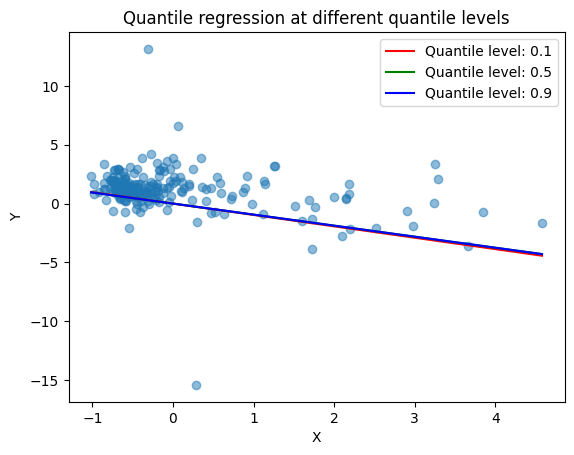

In [11]:
################################ Quantile regression plot ##############################
################################ Yt = α + βYt-1 + γXt + εt + θεt-1
# Create a scatter plot of the data
plt.scatter(NFCI, adj_gdp, alpha=0.5) #x, y  

# Plot the quantile regression lines at different quantile levels
x_sort = np.sort(NFCI)
y_pred_1 = quant_reg_1.predict(x_sort)
y_pred_5 = quant_reg_5.predict(x_sort)
y_pred_9 = quant_reg_9.predict(x_sort)

plt.plot(x_sort, y_pred_1, color='red', label='Quantile level: 0.1')
plt.plot(x_sort, y_pred_5, color='green', label='Quantile level: 0.5')
plt.plot(x_sort, y_pred_9, color='blue', label='Quantile level: 0.9')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quantile regression at different quantile levels')
plt.show()


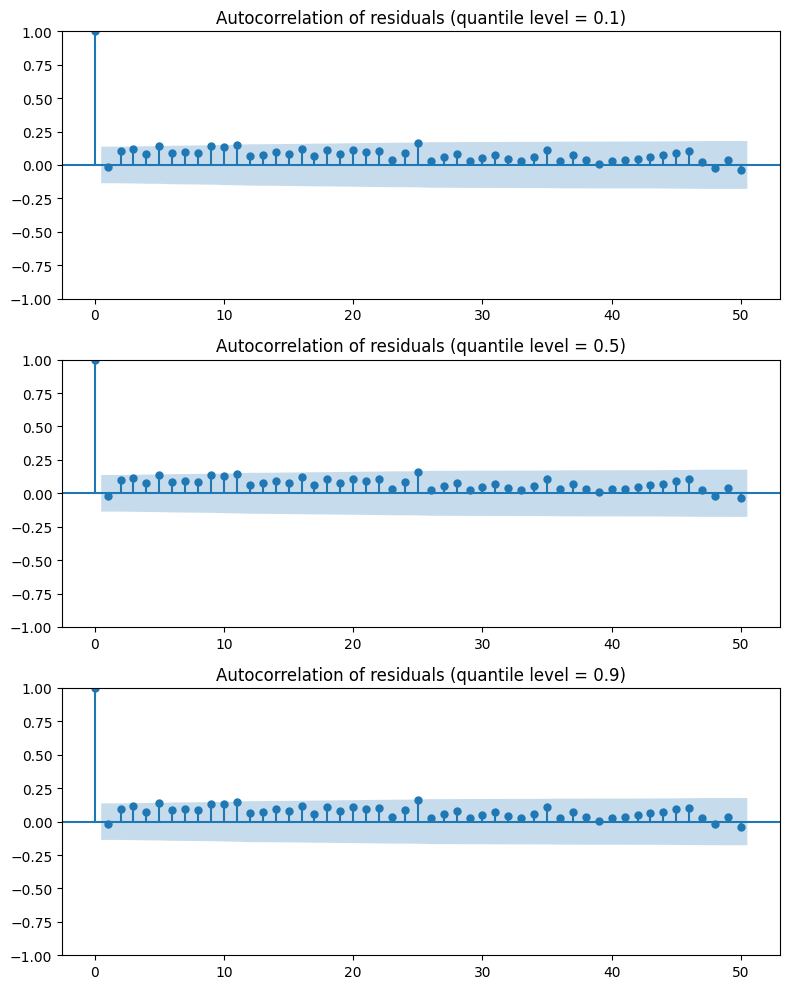

In [12]:
################################ Autocorrelation of the residuals ##############################
residuals_1 = quant_reg_1.resid # Calculate the residuals
residuals_5 = quant_reg_5.resid # Calculate the residuals
residuals_9 = quant_reg_9.resid # Calculate the residuals

# Plot the autocorrelation function of the residuals for all three quantile regression models in one plot
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
plot_acf(quant_reg_1.resid, lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation of residuals (quantile level = 0.1)')
plot_acf(quant_reg_5.resid, lags=50, ax=ax[1])
ax[1].set_title('Autocorrelation of residuals (quantile level = 0.5)')
plot_acf(quant_reg_9.resid, lags=50, ax=ax[2])
ax[2].set_title('Autocorrelation of residuals (quantile level = 0.9)')
plt.tight_layout()
plt.show()

#Autocorrelation fades away as the lags increase



In [13]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform Ljung-Box test with up to 10 lags
lbtest = acorr_ljungbox(residuals_1, lags=50)

# Print p-values for each lag
print(lbtest)

      lb_stat  lb_pvalue
1    0.041781   0.838037
2    2.193717   0.333918
3    5.290815   0.151700
4    6.647242   0.155746
5   11.011095   0.051160
6   12.813967   0.046087
7   14.915888   0.037093
8   16.705378   0.033327
9   20.960097   0.012829
10  24.803220   0.005731
11  29.932410   0.001624
12  30.918186   0.002027
13  32.269654   0.002191
14  34.391272   0.001807
15  35.882610   0.001838
16  39.262121   0.000997
17  40.177963   0.001221
18  43.068815   0.000783
19  44.616854   0.000775
20  47.499707   0.000500
21  49.697435   0.000402
22  52.337438   0.000281
23  52.685031   0.000404
24  54.588625   0.000356
25  60.981064   0.000076
26  61.171162   0.000116
27  62.027303   0.000142
28  63.586015   0.000139
29  63.802327   0.000203
30  64.389223   0.000262
31  65.629223   0.000278
32  66.077124   0.000369
33  66.279557   0.000517
34  67.080209   0.000610
35  70.225485   0.000377
36  70.506044   0.000511
37  71.922570   0.000507
38  72.306457   0.000659
39  72.333091   0.000931


In [14]:
from statsmodels.stats.stattools import durbin_watson
# Perform Durbin-Watson test
dwtest = durbin_watson(residuals_1)

# Print test statistic
print(dwtest)

#positive autocorrelation

1.4856218276750683


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


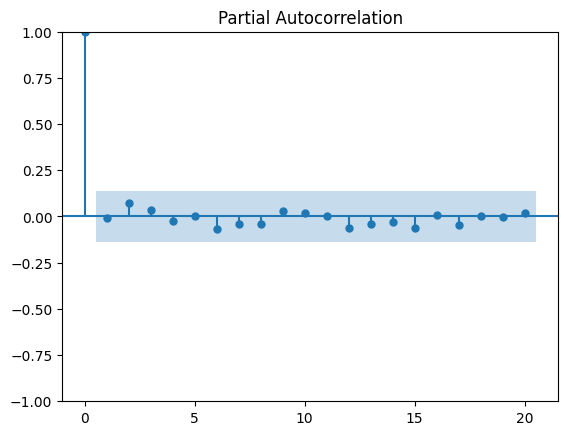

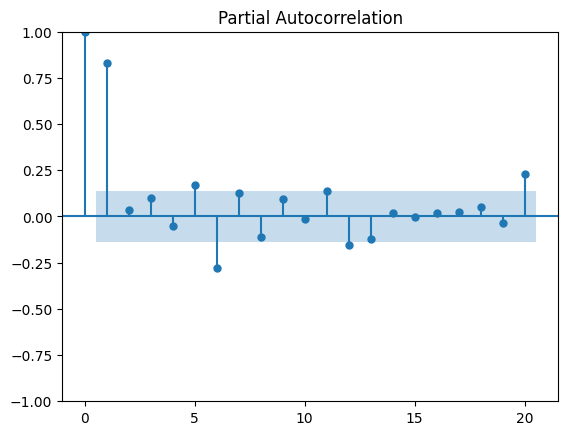

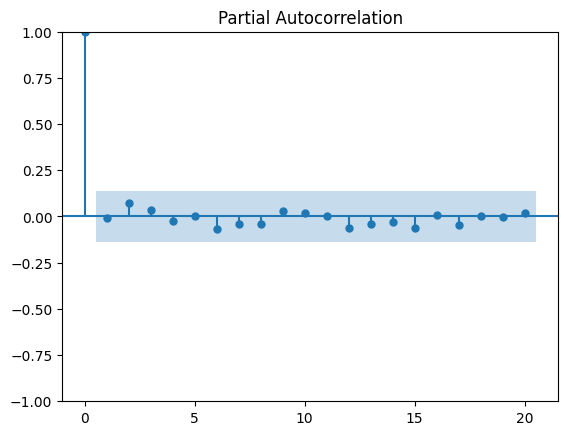

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of the time series
plot_pacf(NFCI, lags=20)
plot_pacf(adj_gdp, lags=20)